In [14]:
import pandas as pd
import numpy as np
import matplotlib.axes as ax
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data_for_lr.csv")

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

## Data Processing

In [6]:
data=data.dropna()
print(data.shape)

(699, 2)


In [7]:
data.isnull().sum()

x    0
y    0
dtype: int64

## Splitting Data

In [8]:
#training input and output
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

#validation data input and output
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

In [9]:
print(f"Training input data shape={train_input.shape}")
print(f"Training output data shape={train_output.shape}")
print(f"Test data input shape={test_input.shape}")
print(f"Test data output shape={test_output.shape}")


Training input data shape=(500, 1)
Training output data shape=(500, 1)
Test data input shape=(199, 1)
Test data output shape=(199, 1)


# <font color="red">Linear Regression</font>

#### Forward Propogation

f(x)=m*x+c

In [10]:
def forward_propagation(train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    prediction=np.multiply(m,train_input)+c
    return prediction

Cost function

summation(1/2n*(y-f(x))^2)

In [11]:
def cost_function(prediction,train_output):
    cost=np.mean((train_output-prediction)**2)/2
    return cost

Gradient Descent for Backward Propagation

df=summ(f(x)-y)/n

dm=df*x

dc=df

In [12]:
def backward_propagation(train_input,train_ouput,prediction):
    derivatives=dict()
    df=prediction-train_output
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    derivatives["dm"]=dm
    derivatives["dc"]=dc
    return derivatives

### Update Parameters

m=m-(learning rate * dm) <br>c=c-(learning rate*dc)

In [13]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"]=parameters["m"]-learning_rate * derivatives["dm"]
    parameters["c"]=parameters["c"]-learning_rate * derivatives["dc"]    
    return parameters

## Model Training

In [25]:
def train(train_input,train_output,learning_rate,iters):
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    plt.figure()
    loss=list()
    for i in range(iters):
        #forward propagation
        predictions=forward_propagation(train_input,parameters)
        #cost function
        cost=cost_function(predictions,train_output)
        loss.append(cost)
        print(f"Iteration={i+1},Loss={cost}")
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="Original")
        ax.plot(train_input,predictions,"*",label="Training")
        legend=ax.legend()
        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,predictions,"*",label="Training")
        plt.show()
        
        #backward propagation
        derivatives=backward_propagation(train_input,train_output,predictions)
        #updating parameters
        parameters=update_parameters(parameters,derivatives,learning_rate)
        
    return parameters,loss

## Training

Iteration=1,Loss=226.89342167727182


<Figure size 640x480 with 0 Axes>

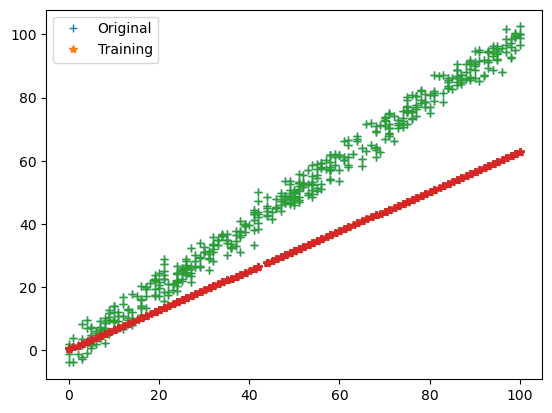

Iteration=2,Loss=105.09687849312998


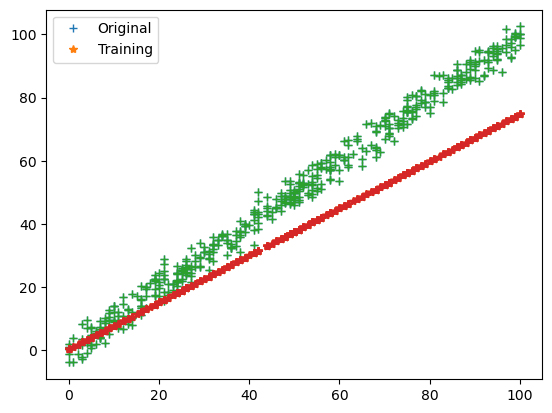

Iteration=3,Loss=49.83765099376173


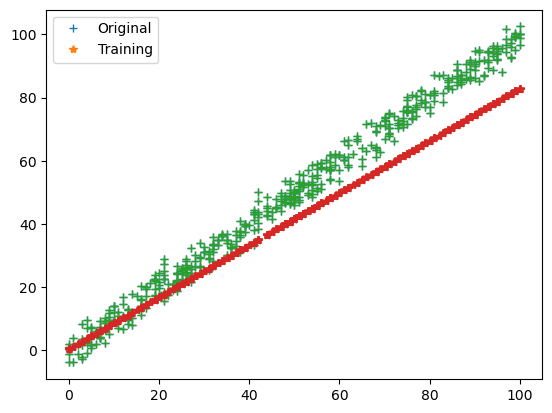

Iteration=4,Loss=24.766477320096076


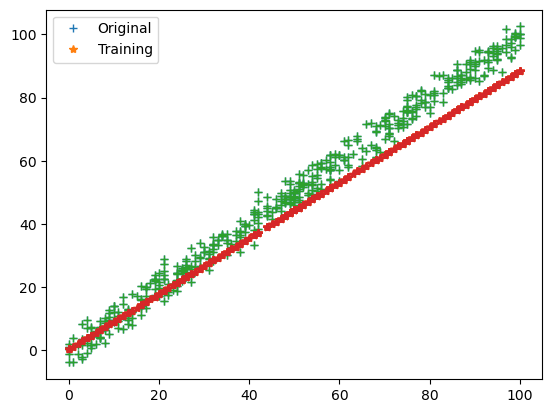

Iteration=5,Loss=13.391657104732218


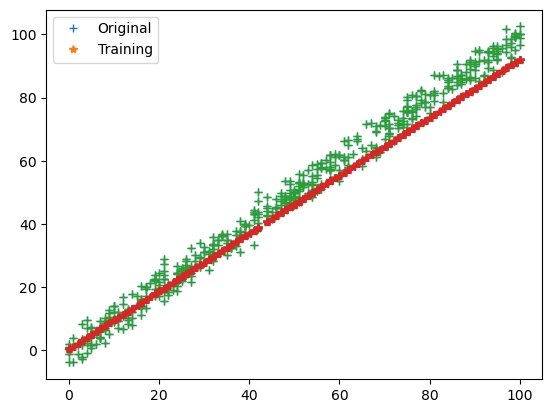

Iteration=6,Loss=8.23088762409324


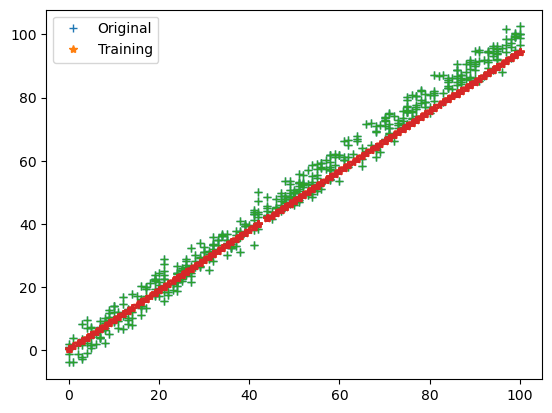

Iteration=7,Loss=5.889439844785531


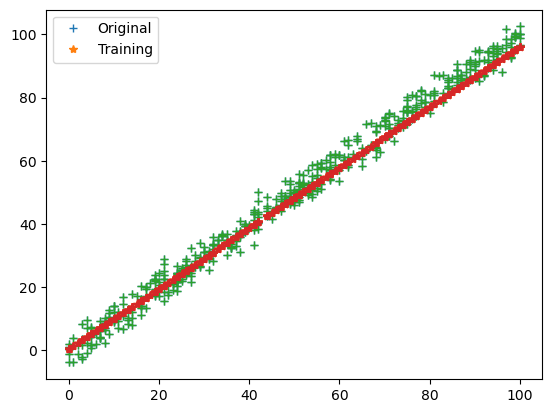

Iteration=8,Loss=4.827121444216531


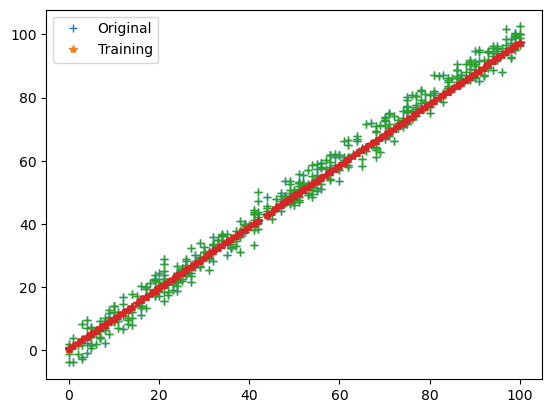

Iteration=9,Loss=4.345145459645548


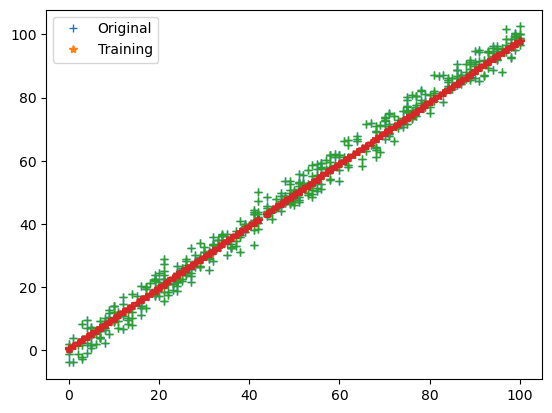

Iteration=10,Loss=4.1264714720718745


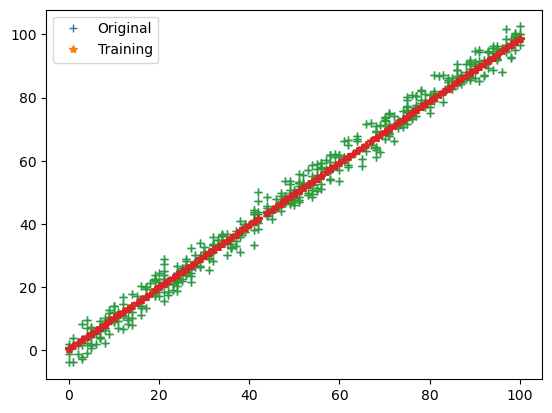

Iteration=11,Loss=4.027257892227859


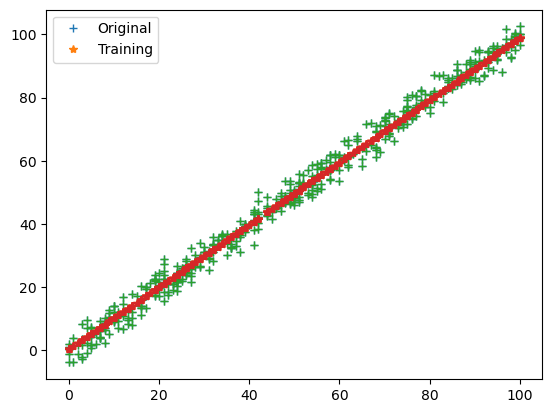

Iteration=12,Loss=3.982243631737884


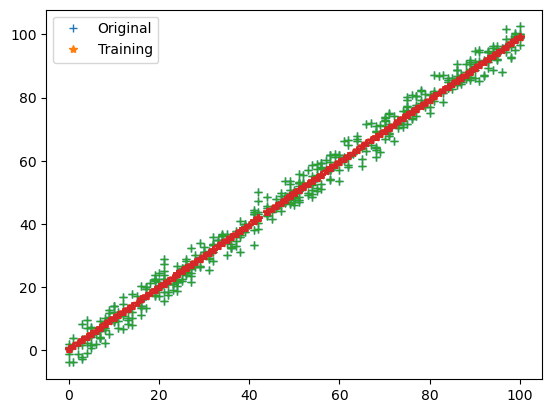

Iteration=13,Loss=3.961819662520066


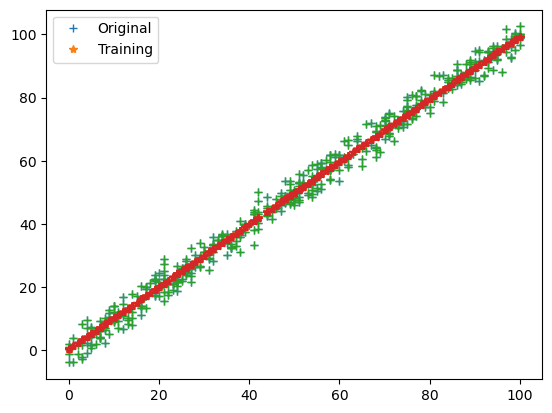

Iteration=14,Loss=3.952552335737466


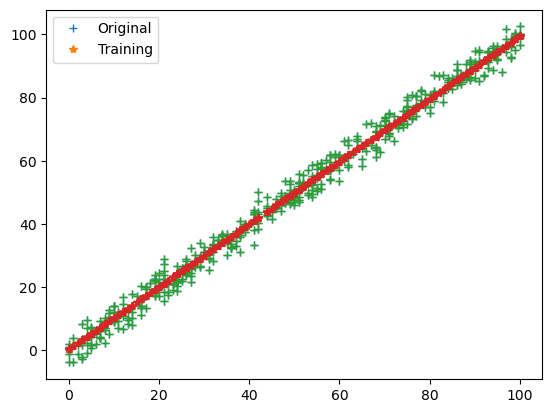

Iteration=15,Loss=3.948346790033105


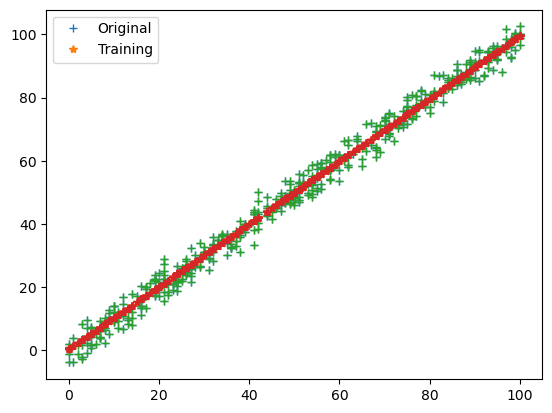

Iteration=16,Loss=3.9464377800583934


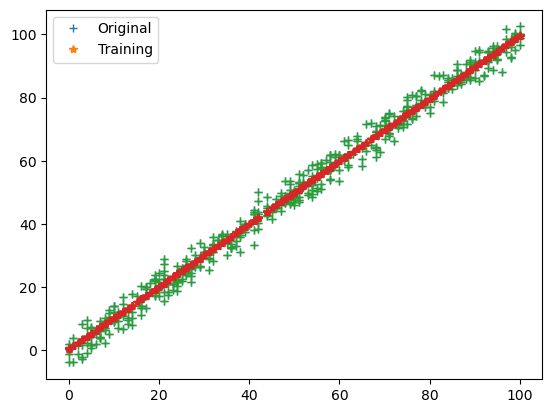

Iteration=17,Loss=3.945570710935779


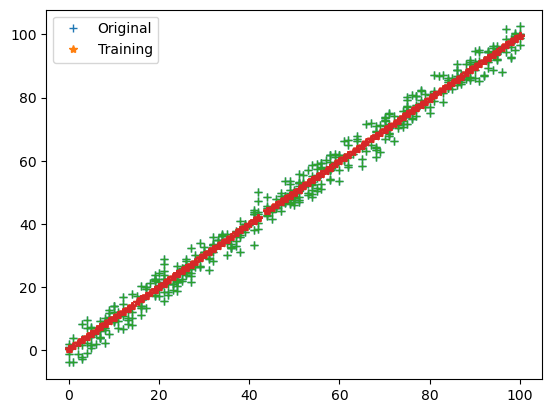

Iteration=18,Loss=3.9451763715796724


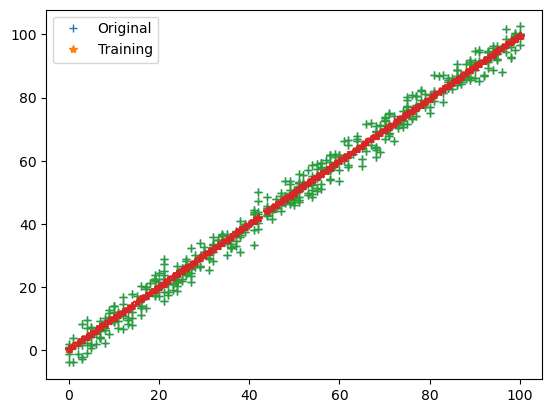

Iteration=19,Loss=3.944996510290053


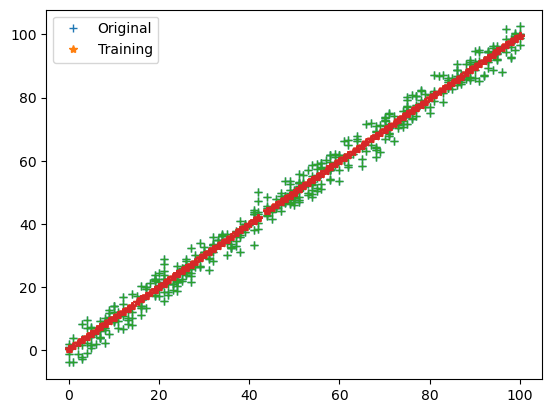

Iteration=20,Loss=3.944913957984575


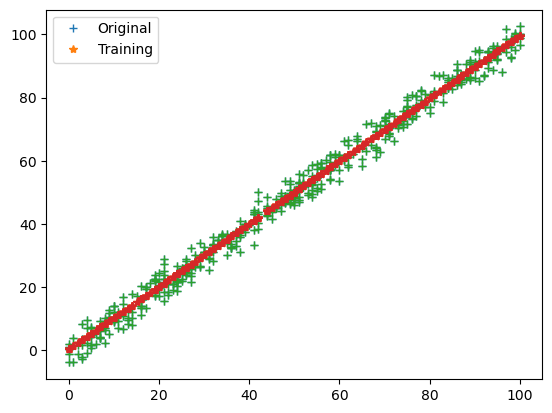

In [26]:
parameters,loss=train(train_input,train_output,0.0001,20)

In [27]:
loss

[226.89342167727182,
 105.09687849312998,
 49.83765099376173,
 24.766477320096076,
 13.391657104732218,
 8.23088762409324,
 5.889439844785531,
 4.827121444216531,
 4.345145459645548,
 4.1264714720718745,
 4.027257892227859,
 3.982243631737884,
 3.961819662520066,
 3.952552335737466,
 3.948346790033105,
 3.9464377800583934,
 3.945570710935779,
 3.9451763715796724,
 3.944996510290053,
 3.944913957984575]

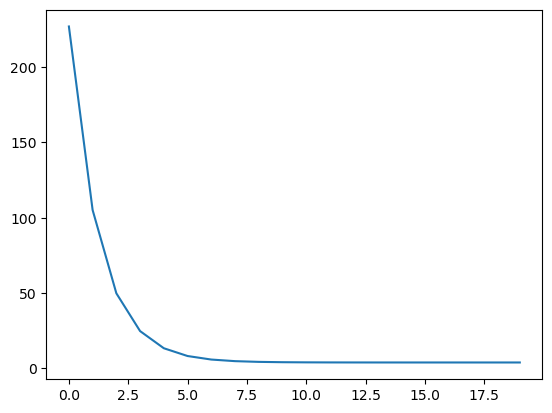

In [28]:
plt.plot(loss)

## Lets Predict

In [31]:
test_prediction=test_input*parameters["m"]+parameters["c"]

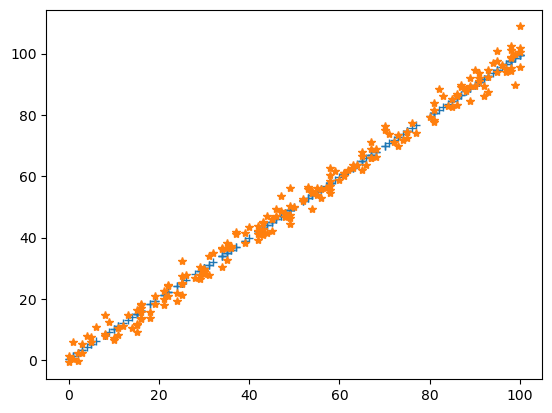

In [32]:
plt.plot(test_input,test_prediction,"+")
plt.plot(test_input,test_output,"*")
plt.show()

## Cost of Prediction

In [40]:
cost_function(test_output,test_prediction)

3.99390529412224